# EE 538: Analog Circuits for Sensor Systems
## Autumn 2020
## Instructor: Jason Silver

## EE 538 basics I

 - Instructor
     - Jason Silver
     - Office hours TBD via Google poll
 - Teaching assistant
     - Xichen Li
     - Office hours TBD
 - Web page: [EE 538 Autumn 2020 (Canvas)](https://canvas.uw.edu/courses/1417759/assignments/syllabus)
     - Access assignments, grades, and solutions
 - Slack
     - [EE 538 Autumn 2020 Slack workspace](https://join.slack.com/t/uwacss2020/shared_invite/zt-hrrk17vm-wIpL7j1dWl9xgfnkmdnLyQ)
     - Use Slack to ask questions about assignments and projects
     - Participation in online discussion benefits everyone!
     
         

## EE 538 basics II

 - There are no official prerequisites, but it will be helpful to have some familiarity with
     - Elementary circuit theory
        - KVL, KCL, Thevenin equivalent circuits, Laplace/Fourier transforms
     - Semiconductor device operation and circuit analysis 
         - Diodes, FETs, BJTs
     - Basic linear systems
         - Frequency response, poles, zeros, Bode plots
     - Circuit simulation with some flavor of SPICE (__S__imulation __P__rogram with __I__ntegrated __C__ircuit __E__mphasis)
         
         

## Course breakdown

- Weekly Assignments (50%)
    - Typically assigned Saturday, submitted online the Sunday of the following week
- Design project (50%)
    - Analog/mixed-signal design project with Python/Jupyter Notebooks and LTspice
    - Optimization for performance, power, cost


## Course learning goals

 - Develop deeper understanding of analog circuit building blocks and how they interface with sensors and other circuit blocks
 - Understand factors affecting precision in data acquisition systems, and how to optimize wrt to power, cost, complexity, etc.
 - Develop a systematic approach to circuit/system design
    - Focus on analysis/scripting early in the design process
    - Employ SPICE to validate calculations and assumptions

## Course topics

- Fundamental devices: resistors, capacitors, transistors, opamps
- Basic opamp gain/filter circuits
    - Sensor interfacing
    - Loading
- Precision in circuits
    - Device noise: flicker and thermal
    - Amplifier offset
    - Component tolerance
- Data converters
    - Sampling fundamentals
    - Quantization noise


## Software and CAD 

 - We will use LTspice for circuit simulation
     - [LTSpice IV Getting Started](https://www.analog.com/media/en/simulation-models/spice-models/LTspiceGettingStartedGuide.pdf?modelType=spice-models)
     - You may use other tools “at your own risk”
 - Design, data analysis, and results plotting using Python/Jupyter Notebooks
    - Design scripts iterable and reusable
    - More flexible than LTspice native plotting functions
    - Lecture examples created using Python/Jupyter Notebooks
 - LTspice simulation basics will be presented following today’s lecture

## SPICE design methodology

 - SPICE is a numerical simulation tool that enables you to evaluate circuit ideas
 - General rule: Don't simulate something you don't already (mostly) understand
    - SPICE is for verification only!
 - Neither analytical nor simulation models provide a complete picture of reality
     - Understanding model limitations is crucial to building successful circuits and systems

## JupyterHub

 - Jupyter Hub enables execution of Python code without the need for installation/maintenance of packages, etc
 - Lecture notes/slides will be made available in student directories several days prior to lecture
 - [EE538 Jupyter Hub Server](https://rttl.axdd.s.uw.edu/2020-autumn-e-e-538-a)
 - Please log out of the server when you're not using it!
 

# Lecture 1 - Foundations

## What is a sensor?

- A sensor is a device that receives a _stimulus_ and responds with an _electrical signal_
- Examples of stimuli are light intensity and wavelength, sound, force, acceleration, distance, rate of motion and chemical composition
- The _electrical signal_ is typically voltage, current, or charge

## Sensor systems

<center><img src="img/sensor_systems.png" width=1200 height=1200 /></center>

 - Data acquisition systems comprise one or more sensors, each of which may interface with a dedicated or multiplexed (shared) ADC 
 - Typical sensing elements produce low-level analog signals that require further processing
 - Interface circuitry is used to amplify, buffer, level-shift, or filter sensor outputs for further processing (e.g. A/D conversion), a process referred to as _signal conditioning_ (primary topic of this course)
 - Some sensor systems may be "fully integrated," in which case all interface elements (including an ADC) are part of a single physical package, often termed a _sensing module_
 - Advantageous to perform as much processing as possible in the digital domain

## Thevenin equivalent circuit

 <center><img src="img/thevenin.png" width=1000 height=1000 /></center>


 - Thevenin voltage ($V_{th}$) determined by measuring the open-circuit (unloaded) voltage
 - Equivalent resistance ($R_{eq}$) determined by removing (setting to zero) any independent voltage/current sources, applying a test voltage (or current), and measuring the resulting current (or voltage)


## Norton equivalent circuit

 <center><img src="img/norton.png" width=1000 height=1000 /></center>

 - Norton current determined by measuring the short-circuit (fully loaded) current
 - Equivalent resistance same as for the Thevenin model


## Voltage divider

<center><img src="img/voltage_divider.png" width=400 height=400 /></center>

<center><img src="img/thevenin_resistance.png" width=400 height=400 /></center>

 - The Thevenin voltage is determined by measuring $V_{out}$ in the unloaded condition 
 - In this case, $V_{th} = V_{in} \cdot R_2/(R_1+R_2)$
 - $R_{eq}$ is determined by setting $V_{in}$ equal to zero (short circuit), applying a test voltage at the output, and measuring the current
 - In this case, $R_{eq} = \frac{V_t}{I_t} = R_1 || R_2$

## Loading

<center><img src="img/loading.png" width=600 height=600 /></center>


 - In electronic circuits, we’re always connecting the output of “something” to the input of “something else”
 - The loading effect of the following stage causes a reduction of signal, dependent on the ratio of $R_{out}$ to $R_{in}$ 
 - For voltage signals, it is usually best to keep $R_{out} << R_{in}$ (a good rule of thumb is a factor of 10, but this depends on the needed precision)
 - For current signals, we want the opposite ($R_{out} >> R_{in}$)

## Sensor interface

<center><img src="img/voltage_sensor.png" width=400 height=400 /></center>

<center><img src="img/current_sensor.png" width=400 height=400 /></center>

 - Input/output impedances are generally complex, as they may include reactive components (capacitances and/or inductances)
 - Sensor output impedance $Z_{out}$ is connected to the input impedance of the interface circuit, $Z_{in}$
 - To minimize distortion due to loading, a voltage-output sensor should have $Z_{out}$ as small as possible, while $Z_{in}$ of the interface circuit should be high
 - In contrast, a current-output sensor should have $Z_{out}$ as _large_ as possible, while $Z_{in}$ of the interface circuit should be low 

<center><img src="img/voltage_sensor.png" width=400 height=400 /></center>

#### Voltage divider:
\begin{equation} V_{in} = \frac{Z_{in}}{Z_{in}+Z_{out}}\cdot V_S \end{equation}

$$Z_{in} >> Z_{out} \rightarrow \boxed{V_{in} \approx V_S} $$

<center><img src="img/current_sensor.png" width=400 height=400 /></center>

#### Current divider:
$$ I_{in} = \frac{Z_{out}}{Z_{in}+Z_{out}}\cdot I_S $$

$$Z_{out} >> Z_{in} \rightarrow \boxed{I_{in} \approx I_S} $$

## General rules/observations

- To be considered a voltage source, a sensor or circuit should exhibit low output impedance
- In contrast, a current source should exhibit high output impedance
- To effectively process a voltage signal, an interface circuit should have high input impedance (as high as possible)
- To process a current signal, an interface circuit should exhibit low input impedance (as low as possible)
- The notion of what constitutes a "low" and "high" impedance is always _relative_

## Signal conditioner input stage

<center><img src="img/signal_conditioner.png" width=450 height=450 /></center>

$$ V_{sig}(V_{in}) = \frac{Z_{in}}{Z_{out}+Z_{in}}V_{in}$$

- In addition to input impedance, other properties of the signal conditioner (e.g. an amplifier) influence the precision of the data acquisition process:
    - $e_o$ is the input *offset voltage*, typically assumed to be constant, which directly adds to the DC voltage of the sensor
    - $i_b$ is the input *bias current*, which can lead to a large voltage drop for a sensor with high output impedance
    - $e_n$ and $i_n$ represent the internal noise generators of the signal conditioning circuitry, *input-referred* to the sensor interface

## Superposition
<br>
<center><img src="img/superposition_eo.png" width=600 height=600 /></center>

 - The effect of each source should be assessed independently of the others using superposition
 - In the case of the offset voltage $e_o$, the signal voltage is
 
 $$ V_{sig}(e_o) = \frac{Z_{in}}{Z_{out}+Z_{in}}e_o$$
 - For $i_n$, we have $$ V_{sig}(i_n) = \frac{Z_{out}\cdot Z_{in}}{Z_{out}+Z_{in}}i_n$$

# Python packages/modules

For plotting/visualization, __matplotlib__ is indispensable. We'll use the shorthand __plt__ for quickly creating plots:

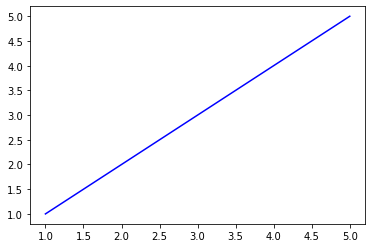

In [322]:
import matplotlib
import matplotlib.pyplot as plt 
x = [1, 2, 3, 4, 5]
y = x
plt.plot(x, y, 'b')

We'll perform certain functions (like plotting signals) frequently, so it makes sense to encapsulate these in reusable modules:

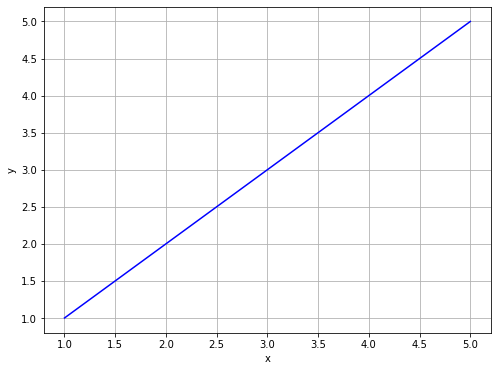

In [323]:
def plot_xy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize = (8.0, 6.0));
    ax.plot(x, y, 'b');
    ax.grid();
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);
    
plot_xy(x, y, 'x', 'y')

Here's a module for plotting two x-y pairs using logarithmic axes for x1 and x2:

In [324]:
def plot_logxy2(x1, y1, x2, y2, x1label, y1label, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (8.0, 6.0));
    ax[0].semilogx(x1, y1, 'b');
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].semilogx(x2, y2, 'b');
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label);
    ax[1].set_ylabel(y2label);
    ax[1].grid();
    
    fig.align_ylabels(ax[:])

And another using linear axes...

In [326]:
def plot_xy2(x1, y1, x2, y2, x1label, y1label, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (8.0, 6.0));
    ax[0].plot(x1, y1, 'b');
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x2, y2, 'b');
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label);
    ax[1].set_ylabel(y2label);
    ax[1].grid();
    
    fig.align_ylabels(ax[:])

We'll use __numpy__ in nearly everything we do, so let's use the industry standard __np__ when importing. 

In [327]:
import numpy as np
x = np.arange(1, 10, step=1)
np.sqrt(x)

array([1.        , 1.41421356, 1.73205081, 2.        , 2.23606798,
       2.44948974, 2.64575131, 2.82842712, 3.        ])

__numpy__, which is written in the C language, is used for array creation and manipulation, and includes a comprehensive library of mathematical functions, random number generators, and more.

The __scipy__ module __signal__ contains many handy signal processing functions:

Text(0.5, 0, 'Frequency [Hz]')

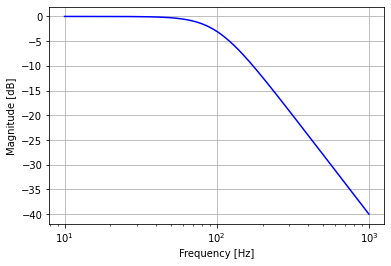

In [329]:
from scipy import signal
b, a = signal.butter(2, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20*np.log10(abs(h)), 'b')
plt.grid()
plt.ylabel('Magnitude [dB]')
plt.xlabel('Frequency [Hz]')

## First-order system

<center><img src="img/RC_lowpass.png" width=400 height=400 /></center>

$$ V_{out}(s) = \frac{\frac{1}{sC}}{R+\frac{1}{sC}}  = \frac{1}{1+sRC} = \frac{1}{1+s\tau}$$

$$ v_{out}(t) = u(t)(1-e^{-t/\tau})$$

 - System (or sensor) dynamic behavior is described by a time-invariant transfer function, which is the ratio of a system output to its input in the Laplace (frequency) domain
 - The "order" of a dynamical system model is determined by the number of independent energy storage elements in a system (in this case, just one capacitor)
 - A first-order system, such as an RC lowpass filter, can be described by a single parameter, $\tau = 1/ \omega_0$ (in addition to the DC gain, which is in this case 1)

## First-order frequency response

- The magnitude response is determined by taking the magnitude of the complex ratio given by the transfer function
- Since a complex number can be described as a vector in the complex plane, the magnitude is the hypotenuse of the right triangle formed by the real and imaginary parts:

$$ \left|\frac{V_{out}}{V_{in}}(j\omega)\right| = \frac{1}{\sqrt{1+(\omega/\omega_0)^2}}$$

- The phase is the angle swept by the vector:

$$ \angle{\frac{V_{out}}{V_{in}}(j\omega)} = 0^{\circ} - \tan^{-1}{(\omega/\omega_0)} $$

## First-order frequency response

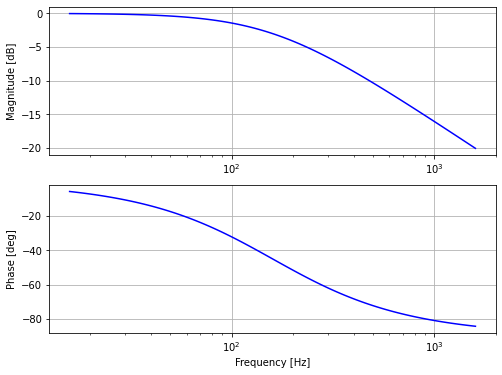

In [330]:
R = 1e3
C = 1e-6
tau = R*C
filt_lp = signal.TransferFunction([1], [tau, 1])
w, mag, phase = filt_lp.bode()       
f = w/2/np.pi        
plot_logxy2(f, mag, f, phase, 'Frequency [Hz]', 'Magnitude [dB]',
           'Frequency [Hz]', 'Phase [deg]')

## First-order transient (step) response

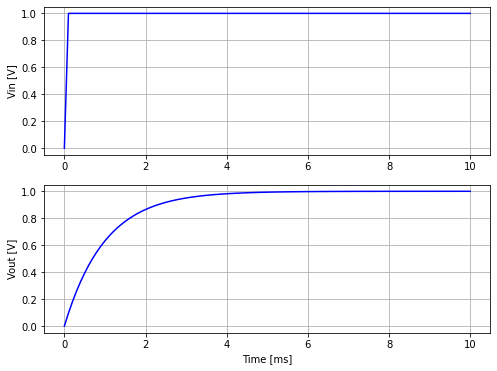

In [331]:
tin = np.linspace(0,10e-3,100)
u_step = np.concatenate( (0, np.ones(99)), axis=None)
tout, vout = signal.step(filt_lp, X0=None, T=tin)

plot_xy2(1e3*tin, u_step, 1e3*tout, vout, 'Time [ms]', 'Vin [V]',
        'Time [ms]', 'Vout [V]')

## Second-order system

<center><img src="img/RLC_filter.png" width=500 height=500 /></center>

\begin{align} V_{out}(s) = \frac{\frac{R}{sCR+1}}{sL+\frac{R}{sCR+1}}  = \frac{1/LC}{s^2+s/RC+1/LC} \\ = \frac{\omega_0^2}{s^2+s\cdot \omega_0/Q+\omega_0^2} \end{align}


 - Second-order systems require two parameters, $\omega_0$ and $Q$, to describe their behavior in the time and frequency domains
 - $Q$, called the *quality factor*, represents the ratio of energy stored to energy lost
 - The lower the value of $Q$, the more "well-behaved" the response 

## Second-order frequency response

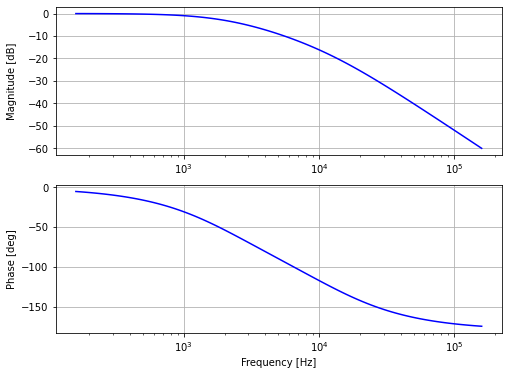

In [360]:
R = .11
C = 100e-6
L = 10e-6
w0 = np.sqrt(1/L/C)
Q = R*np.sqrt(C/L)
filt_second = signal.TransferFunction([w0**2], [1, w0/Q, w0**2])
w, mag, phase = filt_second.bode()       
f = w/2/np.pi        
plot_logxy2(f, mag, f, phase, 'Frequency [Hz]', 'Magnitude [dB]',
           'Frequency [Hz]', 'Phase [deg]')

## Second-order step response

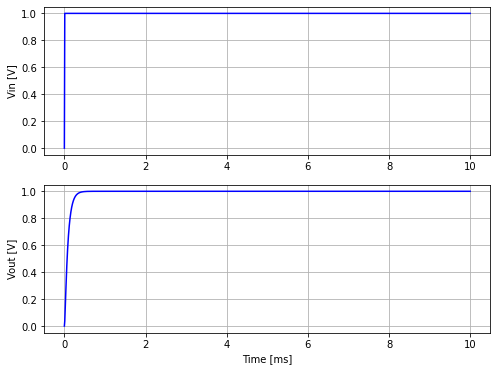

In [361]:
tin = np.linspace(0,10e-3,1000)
u_step = np.concatenate( (0, np.ones(999)), axis=None)
tout, vout = signal.step(filt_second, X0=None, T=tin)

plot_xy2(1e3*tin, u_step, 1e3*tout, vout, 'Time [ms]', 'Vin [V]',
        'Time [ms]', 'Vout [V]')

## Signals

 - Analog signals are often described as sine waves (or sums of sine waves at several frequencies)
 - For example
$$ f(t) = A \cdot \sin{2 \pi f t}, $$

    where $A$ is the amplitude and $f$ the frequency in Hz
 - Another common specification of sinusoidal (and other) signals is the root-mean-square (RMS) amplitude, defined as the square root of the mean squared 
 
$$ f_{RMS} = \sqrt{\frac{1}{T_{1} - T_{2}}\int_{T_1}^{T_2}{[f(t)]^2dt}} $$

## Fourier transform

 - Signals can be represented in the frequency domain using the Fourier Transform
 
 $$ F(j\omega) = \int_{-\infty}^{\infty}f(t) \cdot e^{-j\omega t}dt$$
   
     where $\omega$ is given in rads/sec and $j$ is the imaginary number ($j^2 = -1$)
 - Whereas the Laplace Transform allows us to transition between the time and frequency domains for *systems*, the Fourier Transform is our link between the two domains for *signals*

## Fourier transform of a sine wave

 - Applying Euler's formula, we can express a sine wave as 
 
 $$ A \cdot \cos{\omega_1 t} = A \frac{e^{j\omega_1 t} + e^{-j\omega_1 t}}{2} $$
 - The Fourier transform is thus 
 
 $$F(j\omega) = \frac{A}{2}\cdot [\int_{-\infty}^{\infty}e^{j\omega_1t}e^{-j\omega_1t}dt+\int_{-\infty}^{\infty}e^{-j\omega_1t}e^{-j\omega_1t}dt] $$
 - Applying the Fourier transform of a complex exponential results in 
 
 $$F(j\omega) = \frac{A}{2}\cdot [\delta(\omega+\omega_1)+\delta(\omega-\omega_1)]$$
 - Which is just two unit impulse functions at $2\pi f_1$ and $-2\pi f_2$ 

## Computing and plotting the FFT

In [352]:
from scipy.fft import fft
def fft_mag(x, N, T, t):
    fft_sig  = fft(x, N)  
    freqs = np.linspace(0.0, 1.0/(2.0*T), N//2)
    mags = 2.0/N * np.abs(fft_sig[0:N//2]) # single-sided FFT
    
    return freqs, mags

In [353]:
def plot_fft_dB(freqs, mags, fmin, fmax):
    fig, ax = plt.subplots(figsize = (8.0,6.0))
    ax.plot(1e-3*freqs, 20*np.log10(mags), 'b')
    ax.set_xlim(fmin, fmax)
    ax.set_xlabel('Frequency [kHz]')
    ax.set_ylabel('Magnitude [dB]')
    ax.grid()

## FFT of a sinusoidal signal

### Sine wave in the time domain

In [354]:
# frequency of sine wave, in Hz
f = 1e3               

# frequency in radians
w = 2*np.pi*f

# length of simulation in seconds
t_sim = 10e-3           

# number of sample points
N = 300         

# time array
t_in = np.linspace(0, t_sim, N)

# time-domain signal
v_in = np.sin(w*t_in+ np.pi/3)     

Note that the effective sample rate of the sine wave is $f_s = \frac{N}{t_{sim}} = 30kHz$

### Time-domain plot

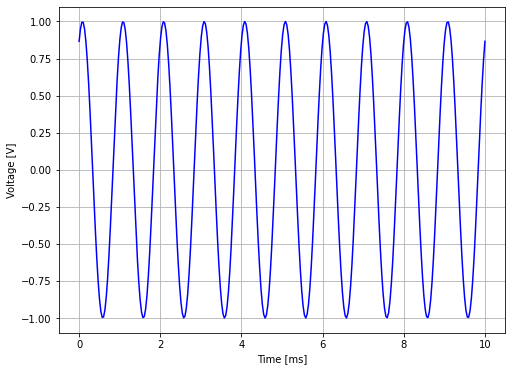

In [355]:
plot_xy(1e3*t_in, v_in, 'Time [ms]', 'Voltage [V]')

### FFT magnitude plot (sine wave)

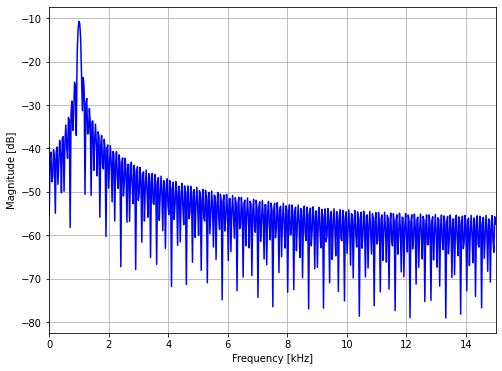

In [362]:
NFFT = 2**10
fft_freq, fft_mag_in = fft_mag(v_in, NFFT, t_sim/NFFT, t_sim)
freq_abs = fft_freq*N/NFFT
plot_fft_dB(freq_abs, fft_mag_in, 0, 15)  

The Fourier Transform only contains information up to the Nyquist frequency, $f_n = f_s/2$

## Rectangular window

<ipython-input-353-8565a99b7993>:3: RuntimeWarning: divide by zero encountered in log10
  ax.plot(1e-3*freqs, 20*np.log10(mags), 'b')


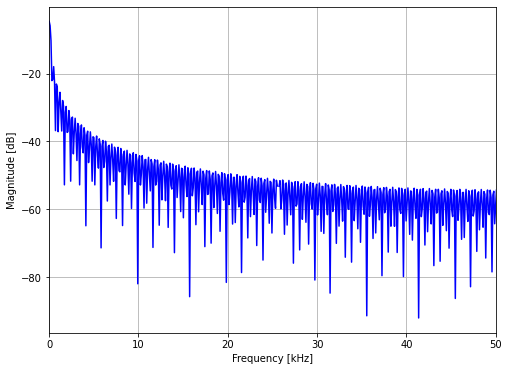

In [357]:
from scipy.signal import boxcar
rect_win = boxcar(N)
fft_freq, fft_rect_win= fft_mag(rect_win, NFFT, t_sim/NFFT, t_sim)            
plot_fft_dB(fft_freq, fft_rect_win, 0, 50)  

### Window example (Hanning)

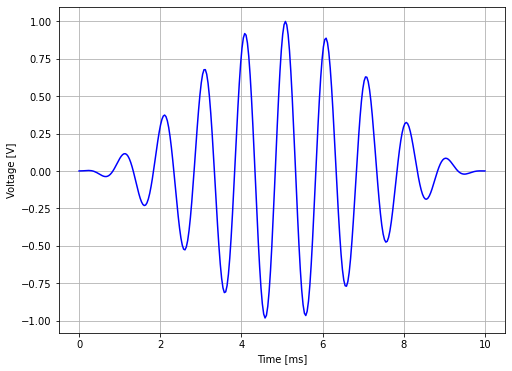

In [366]:
from scipy.signal import hann
from scipy.signal import blackman
from scipy.signal import hamming
win_hann = hann(N)
v_in_windowed = v_in*win_hann
plot_xy(1e3*t_in, v_in_windowed, 'Time [ms]', 'Voltage [V]')

### Windowed FFT (sine wave)

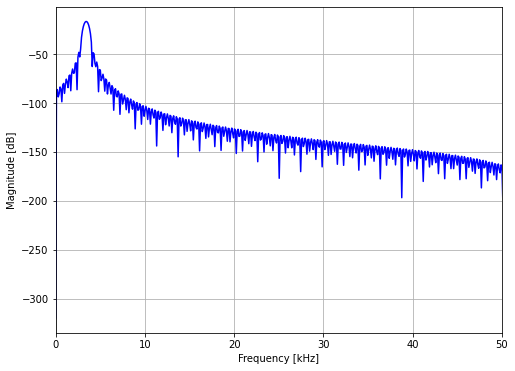

In [367]:
fft_freq, fft_mag_windowed = fft_mag(v_in_windowed, NFFT, t_sim/NFFT, t_sim)            
plot_fft_dB(fft_freq, fft_mag_windowed, 0, 50)  